In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import json

In [2]:
from frbpa.search import riptide_search, p4j_search
from frbpa.utils import get_phase

In [3]:
with open('121102_data.json', 'r') as f:
    r1_data = json.load(f)
burst_dict = r1_data['bursts']

all_bursts = []
for k in burst_dict.keys():
    all_bursts += burst_dict[k]

In [4]:
all_bursts = np.array(all_bursts)
all_bursts = np.sort(all_bursts - np.min(all_bursts))

In [5]:
unique_days = np.unique(np.round(all_bursts))

# Searching for period with narrowest folded profile (Rajwade et al 2020)

In [6]:
cont_frac, p = riptide_search(all_bursts, pmin=2, pmax=2*365)

2020-06-08 14:00:14,359 - riptide_search -root - WARNING - Period/nbins should be greater than tsamp. Not all periods in the given range are valid. Selecting the valid periods from 2.0000793744162086 days for search.
100%|██████████| 25129/25129 [00:23<00:00, 1051.35it/s]
2020-06-08 14:00:38,266 - riptide_search -root - INFO - Max continuous fraction without data is 0.425 at a period of 156.00773908236596 days


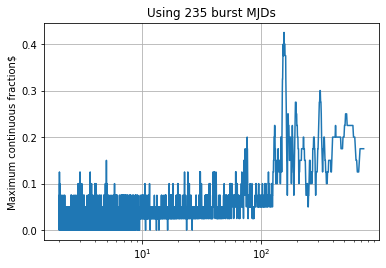

In [7]:
plt.plot(p, cont_frac)
plt.ylabel(r'Maximum continuous fraction$')
plt.title(f'Using {len(all_bursts)} burst MJDs')
plt.grid()
plt.xscale('log')

In [8]:
cont_frac_uniq, p = riptide_search(unique_days, pmin=2, pmax=2*365)

2020-06-08 14:00:38,767 - riptide_search -root - WARNING - Period/nbins should be greater than tsamp. Not all periods in the given range are valid. Selecting the valid periods from 2.0000793775751373 days for search.
100%|██████████| 25128/25128 [00:24<00:00, 1028.44it/s]
2020-06-08 14:01:03,202 - riptide_search -root - INFO - Max continuous fraction without data is 0.425 at a period of 156.00285753163698 days


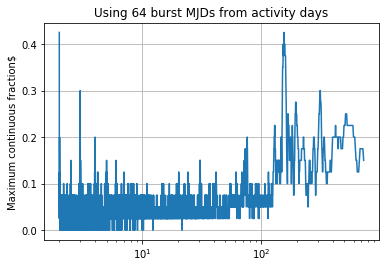

In [9]:
plt.plot(p, cont_frac_uniq)
plt.ylabel(r'Maximum continuous fraction$')
plt.title(f'Using {len(unique_days)} burst MJDs from activity days')
plt.xscale('log')
plt.grid()

#### Looks like we get a period of 156 days, which is consistent with 157±7 days reported by Rajwade et al (2020). Cool! 

# Using P4J
### using QMI based on Euclidean distance for periodogram. See https://github.com/phuijse/P4J

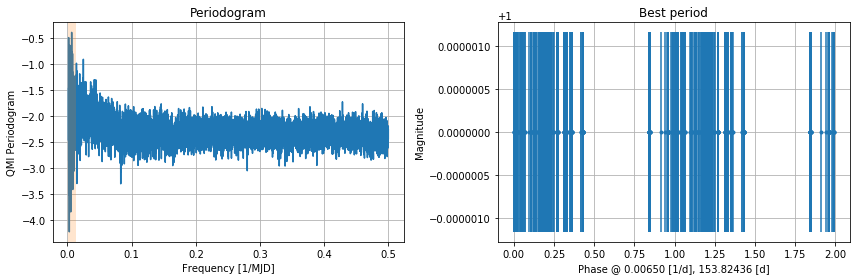

In [34]:
periodogram, _p = p4j_search(all_bursts, pmin=2, pmax=300*2, plot=True, save=False, mjd_err=0.1)

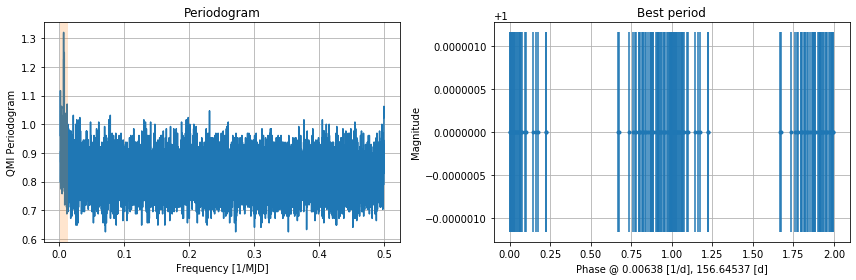

In [29]:
periodogram, _p = p4j_search(unique_days, pmin=2, pmax=365*2, plot=True, save=False, mjd_err=0.1)

#### In this case as well we can recover the period reported by Rajwade et al (2020). Clearly the peaks in periodogram (top left) is not very strong, indicating that the periodicity is not very siginificant. Although, the bottom left periodogram is fairly significant, due to non uniform coverage of observations, it is hard to estimate the significance of this period. 